In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (6,4)

# Dataset 1

In [243]:
excel_file=pd.ExcelFile('hyrdodata.xlsx')
df=pd.read_excel(excel_file, sheet_name="figure 2_unit_hydrograph")

In [244]:
L = 10
phi = 0.4
C = 1.2183396582162898
D = 1.1709401241247828

In [247]:
t = df["Time"][:373]
avgstart = df["peakAvg_start"][:373]

In [1]:
# def split_t(time,flux):
#     maxflux = flux.max()           
#     maxindex = flux.idxmax() 
#     #print(maxt,maxindex)
#     t1 = time[:maxindex+1]
#     t2 = time[maxindex:]
#     t1 = t1.to_numpy()
#     t2 = t2.to_numpy()
#     return t1,t2

Text(0.5, 1.0, 'Flux over time')

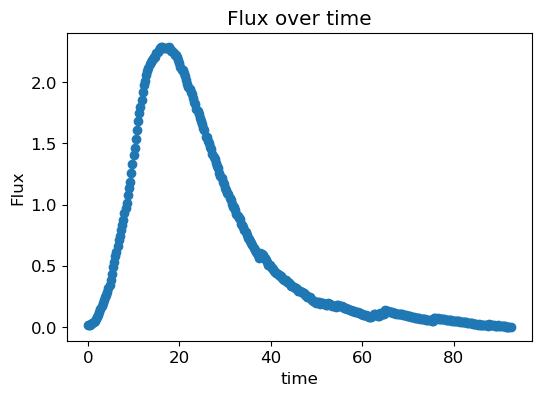

In [251]:
t1,t2 = split_t(t,avgstart)
plt.scatter(t,avgstart)
plt.xlabel('time')
plt.ylabel('Flux')
plt.title('Flux over time')

In [253]:
def Flux(t,fluxdata,H,K):
    U = (K*H)/(L)
    tau = phi*L**2/(H*K)
    t1,t2 = split_t(t,fluxdata)
    #A = +(np.sqrt(D**2*tau/(C**2*t1[-1]))-t1[-1]/tau)
    # Ensure that the argument inside the square root is non-negative
    sqrt_argument = D**2 * tau / (C**2 * t1[-1])  # The argument for the square root
    if sqrt_argument < 0:
        A = np.nan  # or some other default value, depending on your use case
    else:
        A = np.sqrt(sqrt_argument) - t1[-1] / tau
    Qrain = -(C**2*U*H*t1)/(2*tau)
    Qdrought = -(D**2*U*H)/(2*(t2/tau+A)**2)
    return np.abs(Qdrought),np.abs(Qrain),t1,t2

In [255]:
def L2norm(param,t,fluxdata,t1testinterval,t2testinterval):
    H = param[0]
    K = param[1]
    Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H,K)  
    #print(t1points)
    dif1 = 0
    dif2 = 0
    i = 0
    while (i<len(t1)):
        dif1 += np.abs(Qrain[i]-avgstart[i])
        i += t1testinterval
    i = 0  
    while (i<len(t2)):
        dif2 += np.abs(Qdrought[i]-avgstart[i])
        i += t2testinterval
    diftotal = dif1+dif2
    return diftotal

In [257]:
## We minimize the L2 norm at each iteration when removing different points for checking
initial_param = [10,5] 
# FixME use ML algorithm to minimise
result = minimize(L2norm, initial_param, args=(t,avgstart,1,2), method="L-BFGS-B")
H = result.x[0]
K = result.x[1]
print(H,K)

12.698460833655055 0.19020672294557808


Text(0, 0.5, 'Flux')

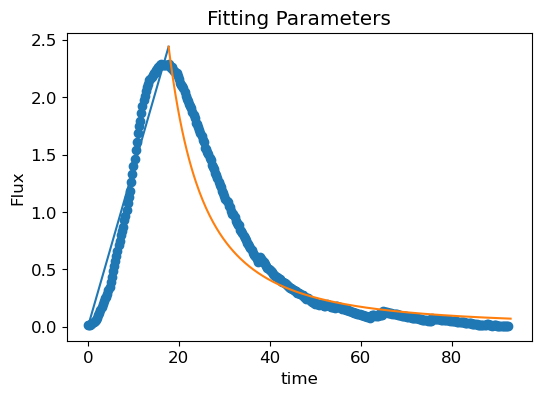

In [258]:
Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H,K)
plt.plot(t1,Qrain)
plt.plot(t2,Qdrought)
plt.scatter(t,avgstart)
plt.title('Fitting Parameters')
plt.xlabel('time')
plt.ylabel('Flux')

# Data set 2

In [542]:
t = df["Time"][486:650]
avgstart = df["peakAvg_start"][486:650]
tarr = t.values
fluxarr = avgstart.values

Text(0.5, 1.0, 'Flux over time')

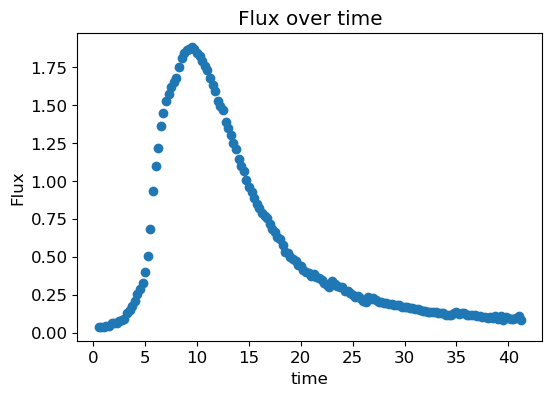

In [544]:
plt.scatter(t,avgstart)
plt.xlabel('time')
plt.ylabel('Flux')
plt.title('Flux over time')

In [598]:
def split_t(time,flux):
    maxflux = flux.max() 
    maxindex = flux.idxmax() 
    t1 = time.iloc[:maxindex-486]
    t2 = time.iloc[maxindex-486:]
    t1 = t1.to_numpy()
    t2 = t2.to_numpy()
    return t1,t2

#t1,t2 = split_t(t,avgstart)
#t1,t2


In [600]:
#split_t(t,avgstart)

In [602]:
def Flux(t,fluxdata,H,K):
    U = (K*H)/(L)99o
    tau = phi*L**2/(H*K)
    t1,t2 = split_t(t,fluxdata)
    #A = +(np.sqrt(D**2*tau/(C**2*t1[-1]))-t1[-1]/tau)
    # Ensure that the argument inside the square root is non-negative
    sqrt_argument = D**2 * tau / (C**2 * t1[-1])  # The argument for the square root
    if sqrt_argument < 0:
        A = np.nan  # or some other default value, depending on your use case
    else:
        A = np.sqrt(sqrt_argument) - t1[-1] / tau
    Qrain = -(C**2*U*H*t1)/(2*tau)
    Qdrought = -(D**2*U*H)/(2*(t2/tau+A)**2)
    return np.abs(Qdrought),np.abs(Qrain),t1,t2

Flux(t,avgstart,10,5)

(array([9.67753243e+01, 4.16081005e+01, 2.30243246e+01, 1.45923945e+01,
        1.00681262e+01, 7.36291236e+00, 5.61777951e+00, 4.42684131e+00,
        3.57805939e+00, 2.95189456e+00, 2.47679340e+00, 2.10780060e+00,
        1.81551964e+00, 1.58007144e+00, 1.38762260e+00, 1.22830615e+00,
        1.09493107e+00, 9.82156485e-01, 8.85948437e-01, 8.03214137e-01,
        7.31550232e-01, 6.69066283e-01, 6.14258800e-01, 5.65919953e-01,
        5.23070444e-01, 4.84909521e-01, 4.50777290e-01, 4.20125996e-01,
        3.92497910e-01, 3.67508139e-01, 3.44831146e-01, 3.24190100e-01,
        3.05348381e-01, 2.88102774e-01, 2.72277961e-01, 2.57722052e-01,
        2.44302923e-01, 2.31905212e-01, 2.20427826e-01, 2.09781877e-01,
        1.99888956e-01, 1.90679681e-01, 1.82092483e-01, 1.74072571e-01,
        1.66571054e-01, 1.59544200e-01, 1.52952790e-01, 1.46761576e-01,
        1.40938804e-01, 1.35455809e-01, 1.30286660e-01, 1.25407853e-01,
        1.20798045e-01, 1.16437818e-01, 1.12309474e-01, 1.083968

In [604]:
def L2norm(param,t,fluxdata,t1testinterval,t2testinterval):
    H = param[0]
    K = param[1]
    Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H,K)  
    dif1 = 0
    dif2 = 0
    i = 0
    while (i<len(t1)):
        dif1 += np.abs(Qrain[i] - avgstart.iloc[i])  # Fixed line
        i += t1testinterval
    i = 0  
    while (i<len(t2)):
        dif2 += np.abs(Qdrought[i] - avgstart.iloc[i])  # Fixed line
        i += t2testinterval
    diftotal = dif1+dif2
    return diftotal

L2norm([5,10],t,avgstart,1,1)

4228.749554421976

In [646]:
## We minimize the L2 norm at each iteration when removing different points for checking
initial_param = [5,1] 
# FixME use ML algorithm to minimise
result = minimize(L2norm, initial_param, args=(t,avgstart,1,1), method="L-BFGS-B")
H = result.x[0]
K = result.x[1]
print(H,K)

7.682863725893839 0.46814565852602497


[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25
 7.5  7.75 8.   8.25 8.5  8.75 9.   9.25]
[ 9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25
 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75 15.   15.25
 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75 18.   18.25
 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75 21.   21.25
 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75 24.   24.25
 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75 27.   27.25
 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75 30.   30.25
 30.5  30.75 31.   31.25 31.5  31.75 32.   32.25 32.5  32.75 33.   33.25
 33.5  33.75 34.   34.25 34.5  34.75 35.   35.25 35.5  35.75 36.   36.25
 36.5  36.75 37.   37.25 37.5  37.75 38.   38.25 38.5  38.75 39.   39.25
 39.5  39.75 40.   40.25 40.5  40.75 41.   41.25]
[1.63526028 1.56903576 1.5067542  1.

Text(0, 0.5, 'Flux')

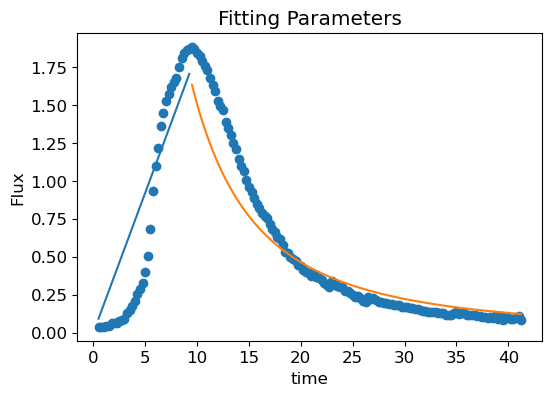

In [656]:
Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H,K)
print(t1)
print(t2)
print(Qdrought)
print(Qrain)
plt.plot(t1,Qrain)
plt.plot(t2,Qdrought)
plt.scatter(t,avgstart)
plt.title('Fitting Parameters')
plt.xlabel('time')
plt.ylabel('Flux')